# Visualizing dyad

In [1]:
import sys; sys.path.append("..")
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from utils.ImagePlot import ImagePlot

plotter = ImagePlot()

In [2]:
X = data.coins()
m, n = X.shape

print(f"Image shape: {m} x {n}")

Image shape: 303 x 384


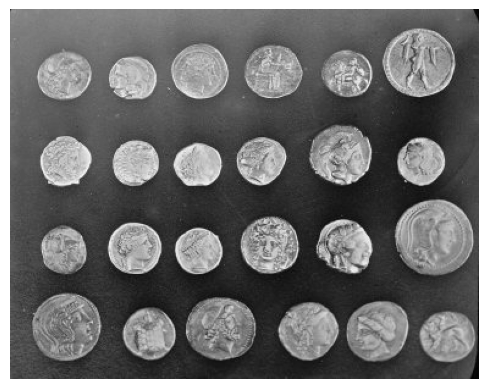

In [3]:
plt.imshow(X, cmap="gray")
plt.axis("off")
plt.show()

In [4]:
U, s, Vh = np.linalg.svd(X)
S = np.zeros(X.shape)
S[:len(s), :len(s)] = np.diag(s)

## Dyad visualization

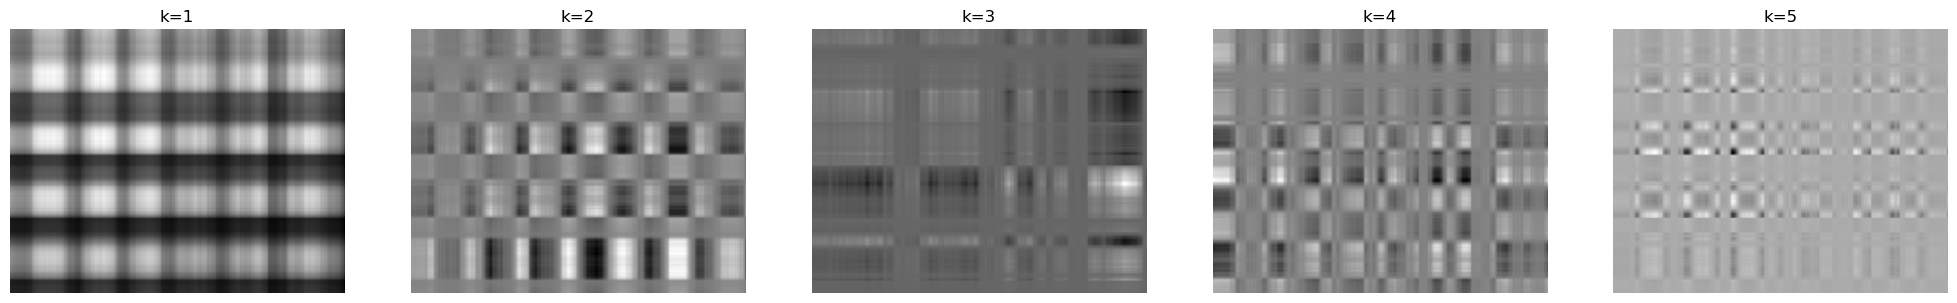

In [5]:
plotter.reset()

for k in range(1, 6):
    i = k - 1
    ui = U[:, i]
    vi = Vh[i, :]
    X_k = s[i] * np.outer(ui, vi)

    plotter.add(X_k, f"k={k}")

plotter.show()

## Singular values plot

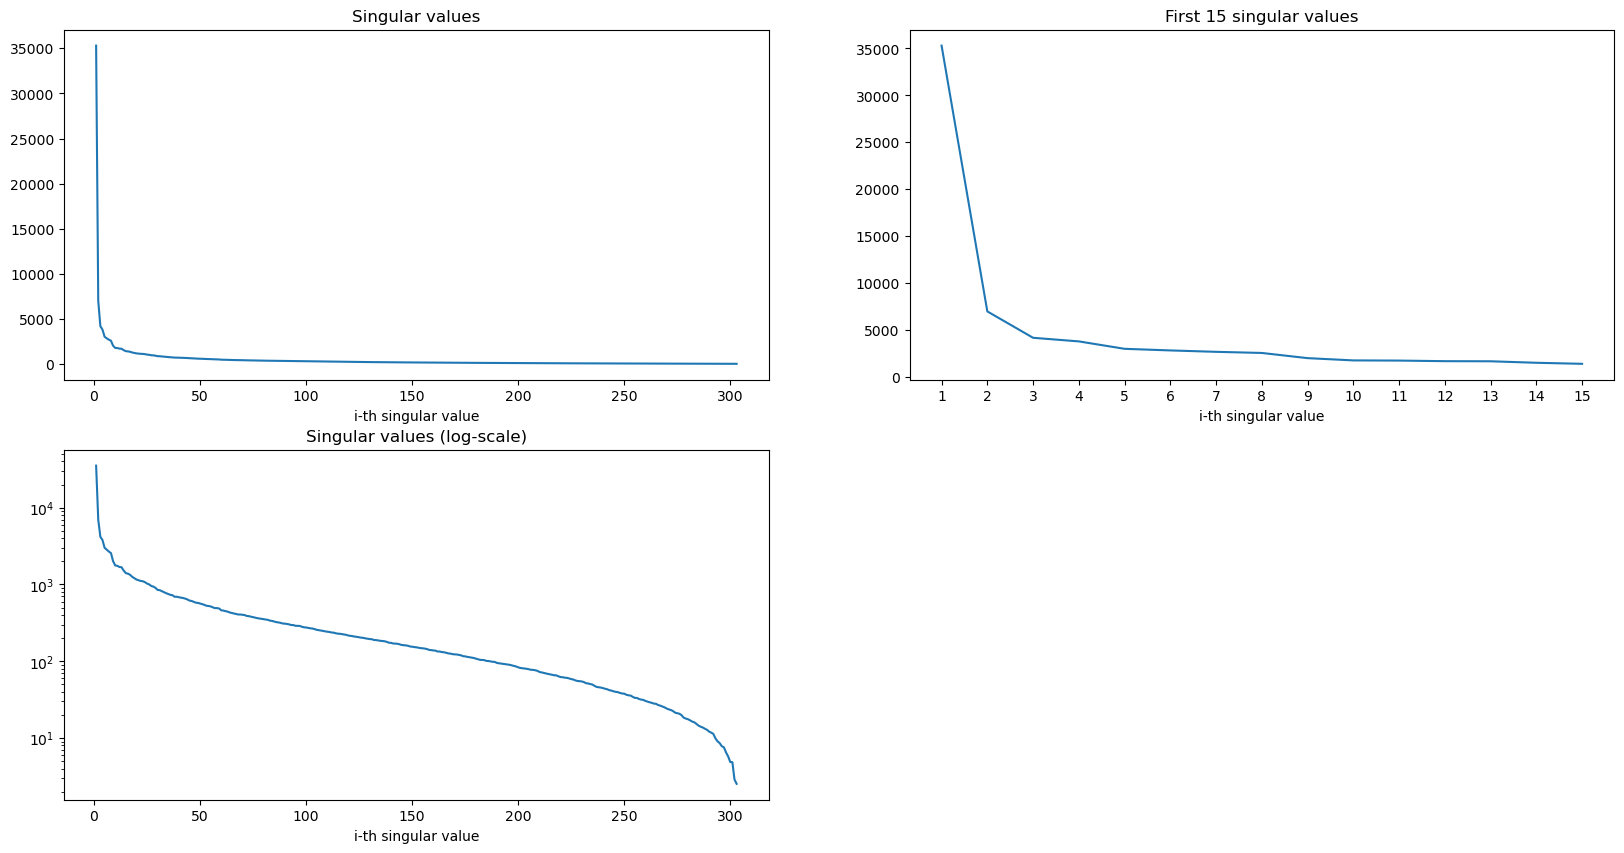

In [6]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot([i+1 for i in range(len(s))], s)
plt.title("Singular values")
plt.xlabel("i-th singular value")

x_limit = 15
plt.subplot(2, 2, 2)
plt.plot([i+1 for i in range(len(s[:x_limit]))], s[:x_limit])
plt.title(f"First {x_limit} singular values")
plt.xlabel("i-th singular value")
plt.xticks(ticks=[i+1 for i in range(len(s[:x_limit]))])

plt.subplot(2, 2, 3)
plt.plot([i+1 for i in range(len(s))], s)
plt.title("Singular values (log-scale)")
plt.xlabel("i-th singular value")
plt.yscale("log")

plt.show()

## $k$-rank approximation

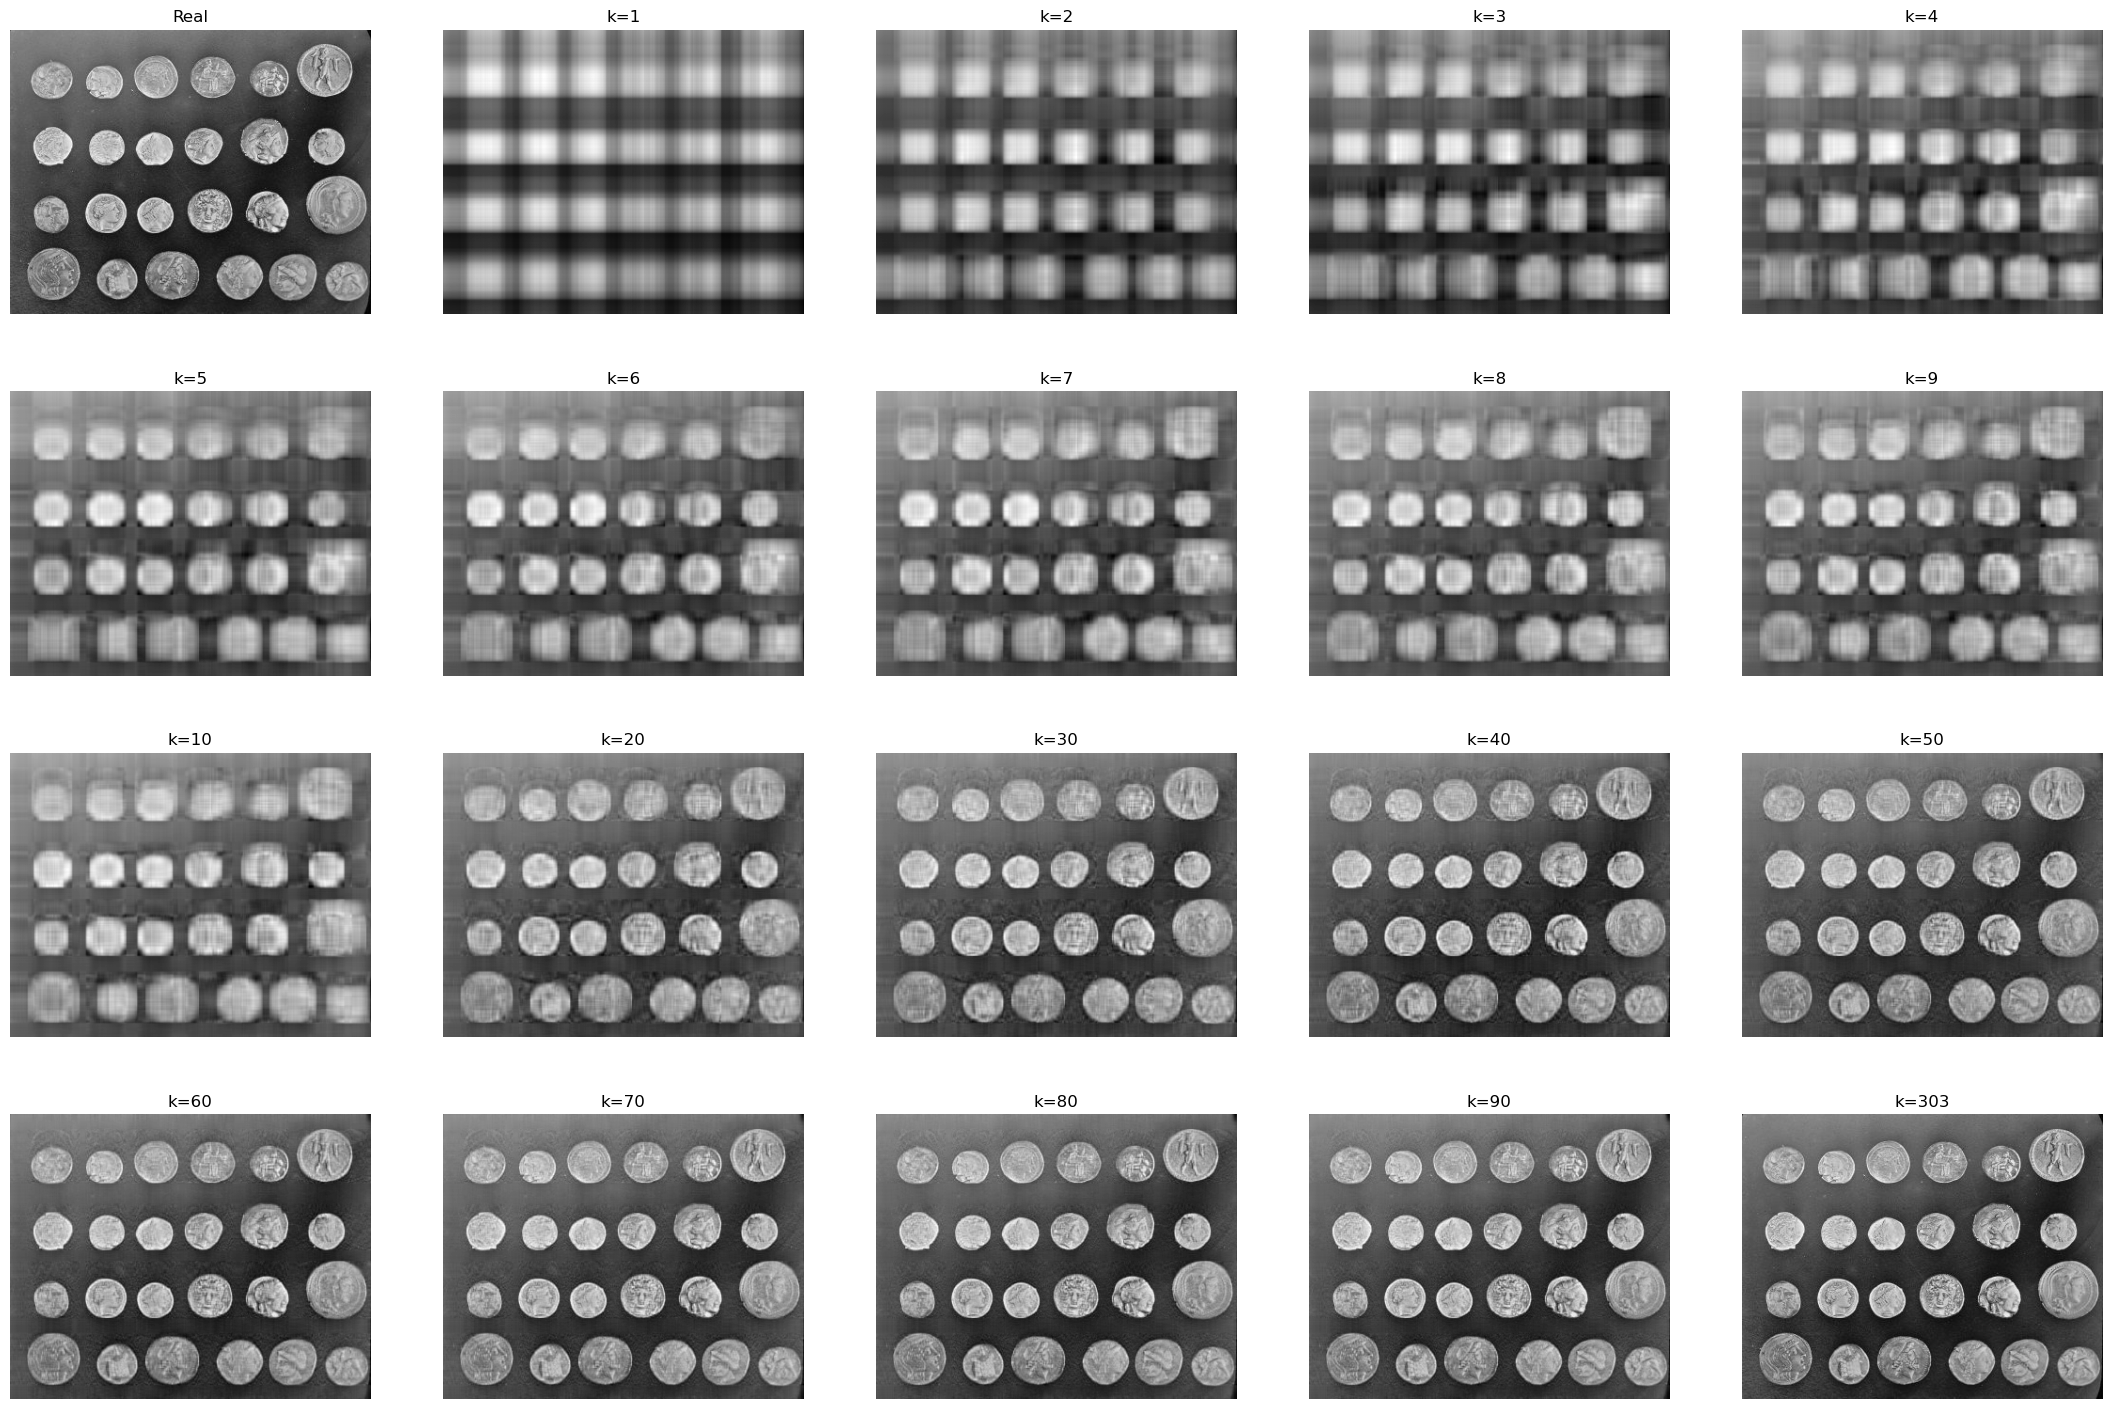

In [7]:
plotter.reset()

plotter.add(X, title="Real")
for k in [*range(1, 11)] + [*range(20, 91, 10)] + [S.shape[0]]:
    X_k_approx = U[:, :k] @ S[:k, :k] @ Vh[:k, :]
    plotter.add(X_k_approx, title=f"k={k}")

plotter.show(figsize=(27, 18))

## Approximation error and compression factor

Approximation error when c_k ≈ 1: 733.1189009399833


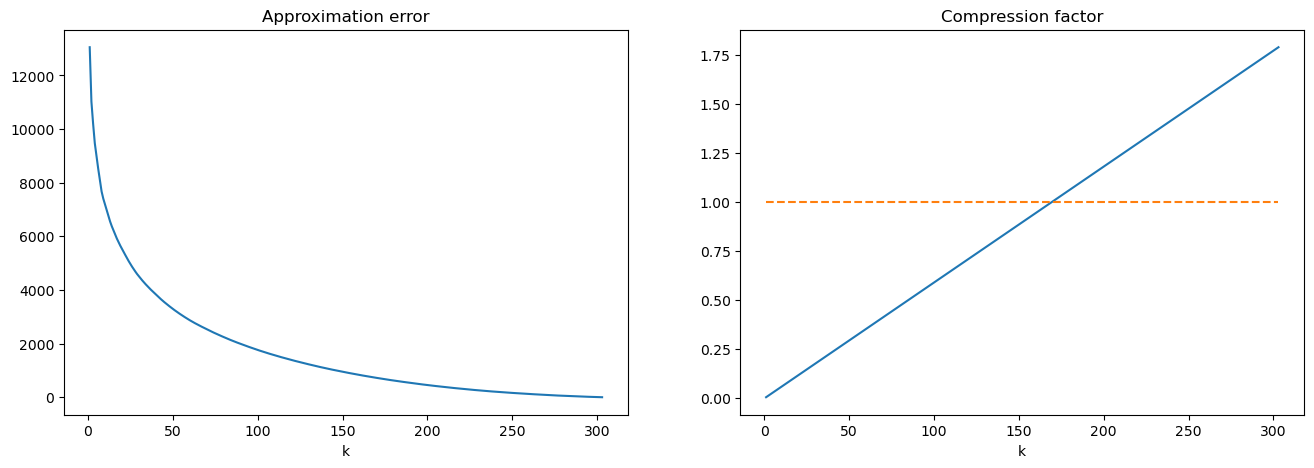

In [8]:
approx_errors = []
compression_factors = []
to_try_k = range(1, np.linalg.matrix_rank(X)+1)

for k in to_try_k:
    X_k_approx = U[:, :k] @ S[:k, :k] @ Vh[:k, :]

    approx_errors.append( np.linalg.norm(X - X_k_approx, "fro") )
    compression_factors.append( (k*(m + n + 1)) / (m*n) )

    if np.around(compression_factors[-1], 2) == 1:
        print(f"Approximation error when c_k ≈ 1: {approx_errors[-1]}")


plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(to_try_k, approx_errors)
plt.title("Approximation error")
plt.xlabel("k")

plt.subplot(1, 2, 2)
plt.plot(to_try_k, compression_factors)
plt.plot(to_try_k, [1 for _ in to_try_k], "--")
plt.title("Compression factor")
plt.xlabel("k")
plt.show()